In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from lightgbm import LGBMClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the data
train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")

In [ ]:
# Display the first few rows of the DataFrame
train_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
# Check for missing values
train_data.isnull().sum()

,0
id,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0


In [ ]:
# Check for duplicated values

duplicates = train_data.duplicated()

# Count the number of duplicated rows
num_duplicates = duplicates.sum()

print("Number of duplicated rows:", num_duplicates)


Number of duplicated rows: 0


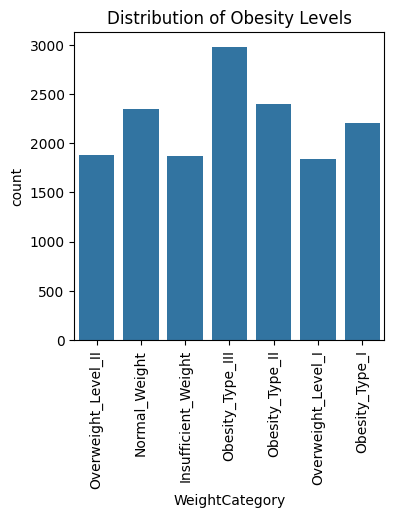

In [ ]:
# Visualize the distribution of the target variable (WeightCategory)

plt.figure(figsize=(4, 4))
sns.countplot(x='WeightCategory', data=train_data)
plt.title('Distribution of Obesity Levels')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Encode target variable into numerical labels
label_encoder = LabelEncoder()
train_data['WeightCategory'] = label_encoder.fit_transform(train_data['WeightCategory'])

In [ ]:
# Split features and target variable

X = train_data.drop(columns=['WeightCategory'])
y = train_data['WeightCategory']

In [ ]:
# Define categorical and numerical features

categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [ ]:
# Split the data into training and validation sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
# Define the LGBM model
lgbm_model = LGBMClassifier()


In [ ]:
# Define the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', lgbm_model)])


In [ ]:
# Define hyperparameters for randomized search

param_grid = {
    'classifier__n_estimators': [100, 210, 350, 420, 570],
    'classifier__max_depth': [4, 6, 8, 12, 14],
    'classifier__learning_rate': [0.01, 0.03, 0.05, 0.2, 0.3],
    'classifier__subsample': [0.5, 0.7, 0.9, 1.0],
    'classifier__colsample_bytree': [0.5, 0.7, 0.9, 1.0],
    'classifier__min_child_samples': [10, 20, 30, 40, 50],
    'classifier__reg_alpha': [0.0, 0.1, 0.5, 1.0],
    'classifier__reg_lambda': [0.0, 0.1, 0.5, 1.0],
    'classifier__min_child_weight': [1e-3, 1e-2, 0.1, 1, 10]
}

In [ ]:
# Perform randomized search cross-validation

random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=120, cv=6, verbose=2, random_state=None, n_jobs=-1)

random_search.fit(X_train, y_train)

Fitting 6 folds for each of 120 candidates, totalling 720 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002517 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 9319, number of used features: 30
[LightGBM] [Info] Start training from score -2.096651
[LightGBM] [Info] Start training from score -1.911422
[LightGBM] [Info] Start training from score -1.943124
[LightGBM] [Info] Start training from score -1.858425
[LightGBM] [Info] Start training from score -1.653758
[LightGBM] [Info] Start training from score -2.111609
[LightGBM] [Info] Start training from score -2.139476
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

RandomizedSearchCV(cv=6,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Age',
                                                                                'Height',
                                                                                'Weight',
                                                                                'FCVC',
                                                                                'NCP',
                                                                                'CH2O',
                                                                                'FAF',
                                                                                'TUE']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['Gender',
                                                                                'family_history_with_overweight',
                                                                                'FAVC',
                                                                                'CAEC',
                                                                                'SMOKE',...
                                        'classifier__learning_rate': [0.01,
                                                                      0.03,
                                                                      0.05,
                                                                      0.02,
                                                                      0.03],
                                        'classifier__max_depth': [5, 6, 9, 12,
                                                                  11],
                                        'classifier__min_child_samples': [10,
                                                                          20,
                                                                          30,
                                                                          40,
                                                                          50],
                                        'classifier__min_child_weight': [0.001,
                                                                         0.01,
                                                                         0.1, 1,
                                                                         10],
                                        'classifier__n_estimators': [100, 210,
                                                                     360, 420,
                                                                     570],
                                        'classifier__reg_alpha': [0.0, 0.1, 0.5,
                                                                  1.0],
                                        'classifier__reg_lambda': [0.0, 0.1,
                                                                   0.5, 1.0],
                                        'classifier__subsample': [0.5, 0.7, 0.9,
                                                                  1.0]},
                   verbose=2)

In [ ]:
# Get the best parameters

best_params = random_search.best_params_
best_model = random_search.best_estimator_

In [ ]:
# Print the best parameters
print("Best Parameters:", best_params)

Best Parameters: {'classifier__subsample': 0.7, 'classifier__reg_lambda': 0.0, 'classifier__reg_alpha': 0.0, 'classifier__n_estimators': 360, 'classifier__min_child_weight': 0.01, 'classifier__min_child_samples': 10, 'classifier__max_depth': 5, 'classifier__learning_rate': 0.03, 'classifier__colsample_bytree': 0.5}


In [ ]:
# Evaluate the best model on the validation set
accuracy = best_model.score(X_test, y_test)
print("Validation Accuracy:", accuracy)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Validation Accuracy: 0.9028001287415514


In [ ]:
# best model on entire dataset
best_model.fit(X,y)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005211 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2042
[LightGBM] [Info] Number of data points in the train set: 15533, number of used features: 30
[LightGBM] [Info] Start training from score -2.117028
[LightGBM] [Info] Start training from score -1.890681
[LightGBM] [Info] Start training from score -1.951333
[LightGBM] [Info] Start training from score -1.866249
[LightGBM] [Info] Start training from score -1.650037
[LightGBM] [Info] Start training from score -2.131030
[LightGBM] [Info] Start training from score -2.111163
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Height', 'Weight',
                                                   'FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'CALC',
                                                   'MTRANS'])])),
                ('classifier',
                 LGBMClassifier(colsample_bytree=0.5, learning_rate=0.03,
                                max_depth=5, min_child_samples=10,
                                min_child_weight=0.01, n_estimators=360,
                                subsample=0.7))])

In [ ]:
# Prepare test data

test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test.csv")


In [ ]:
# Make predictions on test data
test_predictions = best_model.predict(test_data)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Create submission dataframe
submission_df = pd.DataFrame({'id': test_data['id'],
                              'WeightCategory': label_encoder.inverse_transform(test_predictions)})

In [ ]:
# Save submission dataframe to CSV
submission_df.to_csv('submission.csv', index=False) 